## Matrisedynamikk (MIP 10.9)

Dette kan vi få vite av chatgpt:

Et eksempel på **populasjonsdynamikk i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

### **Eksempel: Populasjonsdynamikk i laserindusert fluorescens (LIF)**  
Når et molekyl absorberer en foton fra en laser, blir det eksitert til en høyere elektronisk eller vibrasjonsmessig tilstand. Populasjonen av molekyler i den eksiterte tilstanden utvikler seg over tid på grunn av:

1. **Spontan emisjon** – Molekylet går tilbake til grunntilstanden ved å sende ut en foton.  
2. **Stimuleret emisjon** – En annen foton med samme energi kan indusere molekylet til å sende ut lys.  
3. **Ikke-radiativ relaksasjon** – Molekylet mister energi uten å sende ut lys (f.eks. via kollisjoner eller intern konvertering).  

**Rate-ligningene** som beskriver disse overgangene, er et eksempel på **populasjonsdynamikk** i kjemi. Dette modelleres ofte ved hjelp av **Boltzmann-fordelingen** eller **rate-ligninger som Einstein-koeffisientene**.  

Denne typen populasjonsdynamikk er avgjørende for å forstå **reaksjonskinetikk, spektroskopi og fotokjemi**.

I en **diskret tidsversjon** av populasjonsdynamikk bruker vi en **Markov-prosess**, der populasjonene ved steg \( t+1 \) avhenger av populasjonene ved steg \( t \) gjennom en **transisjonsmatrise**.  

---

### **Diskret tids populasjonsdynamikk med en transisjonsmatrise**  
Vi 
uttrykker populasjonsutviklingen som:  

$$
\mathbf{N}(t+1) = T \mathbf{N}(t)
$$

hvor:

- $ \mathbf{N}(t) = \begin{bmatrix} N_g(t) \\ N_e(t) \end{bmatrix} $ representerer populasjonene ved tidspunkt $ t $.
- $ T $ er **transisjonsmatrisen**, som bestemmer hvordan populasjonene endrer seg mellom tidssteg.

Et enkelt valg for $ T $ er:

$$
T = \begin{bmatrix} 
1 - p_{ge} & p_{eg} \\ 
p_{ge} & 1 - p_{eg} 
\end{bmatrix}
$$

hvor:
- $ p_{ge} $ er sannsynligheten for overgang fra grunntilstanden til den eksiterte tilstanden per tidssteg.
- $ p_{eg} $ er sannsynligheten for overgang fra den eksiterte tilstanden til grunntilstanden per tidssteg.

---

### **Iterasjon av populasjonsdynamikken**  
Med en initialpopulasjon $ \mathbf{N}(0) $ kan vi beregne fremtidige populasjoner som:

$$
\mathbf{N}(t) = T^t \mathbf{N}(0)
$$

En **likevektstilstand**, er en tilstand $\mathbf{N}_{\text{likevekt}}$ slik at

$$
T \mathbf{N}_{\text{likevekt}} = \mathbf{N}_{\text{likevekt}}
$$

For å finne de likevektstilstandene løser vi:

$$
\begin{bmatrix} 
1 - p_{ge} & p_{eg} \\ 
p_{ge} & 1 - p_{eg} 
\end{bmatrix}
\begin{bmatrix} N_g \\ N_e \end{bmatrix}
=
\begin{bmatrix} N_g \\ N_e \end{bmatrix}.
$$

---

Skriver vi $\vec v = \mathbf{N}_{\text{likevekt}} = \begin{bmatrix} N_g \\ N_e \end{bmatrix}$ står her $T \cdot \vec v = \vec v$.

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra
    

In [4]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier

In [19]:
pge = 0.2
peg = 0.5

T = np.array([
    [1 - pge, peg],
    [pge, 1 - peg]
])

In [20]:
skriv_ut_egenvektorer_og_multiplikasjon_med_matrise(T, finn_egenvektorer_og_egenverdier(T))

Alle vektorer her skal leses som kolonnevektorer

egenverdi:      0.3
egenvektor:     [-1.  1.]
A @ evenvektor: [-0.3  0.3]

egenverdi:      1.0
egenvektor:     [2.5 1. ]
A @ evenvektor: [2.5 1. ]



som gir:

$$
\frac{N_e}{N_g} = \frac{p_{ge}}{p_{eg}}
$$

Dette tilsvarer den kontinuerlige versjonen, men er nå formulert for diskrete tidssteg.

---

### **Eksempelberegning**  
Anta at vi har:
- $ p_{ge} = 0.2 $ (20 % av molekylene går til eksitert tilstand per steg).
- $ p_{eg} = 0.5 $ (50 % av molekylene slapper av tilbake per steg).
- Initialpopulasjon: $ N_g(0) = 1000 $, $ N_e(0) = 0 $.

Etter noen iterasjoner:

1. **Steg 1:**
   $$
   \mathbf{N}(1) = \begin{bmatrix} 0.8 & 0.5 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 1000 \\ 0 \end{bmatrix} = \begin{bmatrix} 800 \\ 200 \end{bmatrix}
   $$

2. **Steg 2:**
   $$
   \mathbf{N}(2) = T \mathbf{N}(1) = \begin{bmatrix} 0.8 & 0.5 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 800 \\ 200 \end{bmatrix} = \begin{bmatrix} 700 \\ 300 \end{bmatrix}
   $$

3. **Steg 10:** Systemet konvergerer til likevektsverdiene $ N_e/N_g = 0.2/0.5 = 2/5 $.

---

### **Anvendelser**  
Denne diskret-tidsmodellen er nyttig i:
- **Monte Carlo-simuleringer av molekylære overganger**.
- **Fotonabsorpsjon/-emisjon i laserfysikk**.
- **Kjemiske reaksjonsnettverk der reaksjoner skjer ved diskrete tidssteg**.

Vil du at jeg skal simulere dette numerisk med et Python-eksempel?

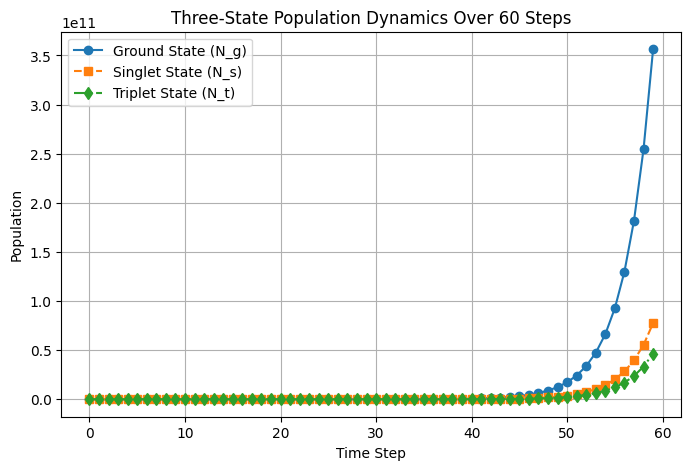

[3.56383983e+11 7.74747788e+10 4.64848673e+10]


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define transition probabilities
p_ge = 0.2  # Excitation (ground -> singlet)
p_eg = 0.4  # Fluorescence (singlet -> ground)
p_st = 0.3  # Inter-system crossing (singlet -> triplet)
p_tg = 0.1  # Phosphorescence (triplet -> ground)

# Transition matrix for the three-state system
T = np.array([[1 - p_ge + p_eg + p_tg, p_eg, p_tg],  # Ground state
              [p_ge, 1 - p_eg - p_st, p_st],         # Singlet excited state
              [0, p_st, 1 - p_tg]])                 # Triplet excited state

# Initial population: all molecules start in the ground state
N0 = np.array([1000, 0, 0])

# Number of time steps
steps = 60

# Store populations over time
populations = np.zeros((steps, 3))
populations[0] = N0

# Iterate the population dynamics
for t in range(1, steps):
    populations[t] = T @ populations[t - 1]

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(populations[:, 0], label="Ground State (N_g)", marker='o', linestyle='-')
plt.plot(populations[:, 1], label="Singlet State (N_s)", marker='s', linestyle='--')
plt.plot(populations[:, 2], label="Triplet State (N_t)", marker='d', linestyle='-.')
plt.xlabel("Time Step")
plt.ylabel("Population")
plt.legend()
plt.title("Three-State Population Dynamics Over 60 Steps")
plt.grid()
plt.show()

# Print final steady-state values
print(populations[-1])
